In [1]:
!pip install opencv-python
!pip install opencv-contrib-python

In [144]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

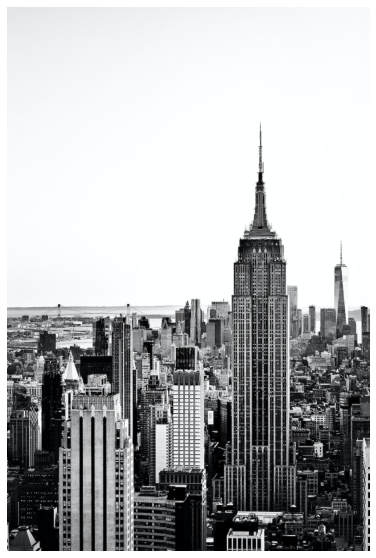

In [205]:
img1 = cv.cvtColor(cv.imread('image2.jpg'), cv.COLOR_BGR2RGB)
showImage(img1)

In [146]:
def showImage(img):
    plt.figure(figsize=(15, 10))
    plt.axis('off')
    plt.imshow(img)

    plt.show()

In [147]:
def hamming_distance(d1, d2):
    if len(d1) != len(d2):
        return -1
    return sum(el1 != el2 for el1, el2 in zip(d1, d2)) / len(d1)

In [225]:
def custom_match(image1, image2):
    brisk = cv.BRISK_create()
    kp1, des1 = brisk.detectAndCompute(image1, None)
    kp2, des2 = brisk.detectAndCompute(image2, None)

    matches = []
    for i, d1 in enumerate(des1):
        for j, d2 in enumerate(des2):
            matches.append(cv.DMatch(_queryIdx=i, _trainIdx=j,  _distance=hamming_distance(d1,d2), _imgIdx=0))
        
    matches = sorted(matches, key=lambda x: x.distance)

 

    showImage(cv.drawMatches(image1, kp1, image2, kp2, matches[:20], None, flags=2))   

In [223]:
def bf_match(image1, image2):
    brisk = cv.BRISK_create()
    kp1, des1 = brisk.detectAndCompute(image1, None)
    kp2, des2 = brisk.detectAndCompute(image2, None)

    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)
    matches = sorted(matches, key = lambda x:x.distance)

    showImage(cv.drawMatches(image1, kp1, image2, kp2, matches[:20], None, flags=2))
    

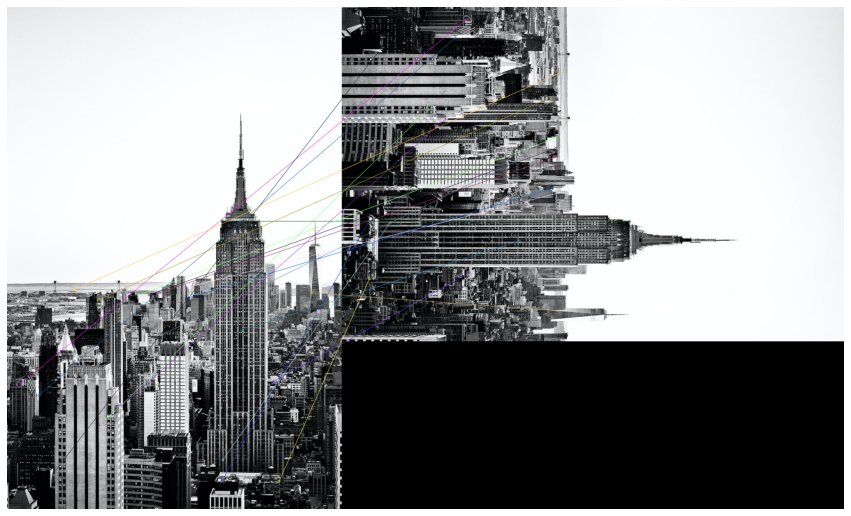

In [174]:
bf_match(img1,imag1)

In [207]:
imag1 = cv.rotate(img1, cv.ROTATE_90_CLOCKWISE)


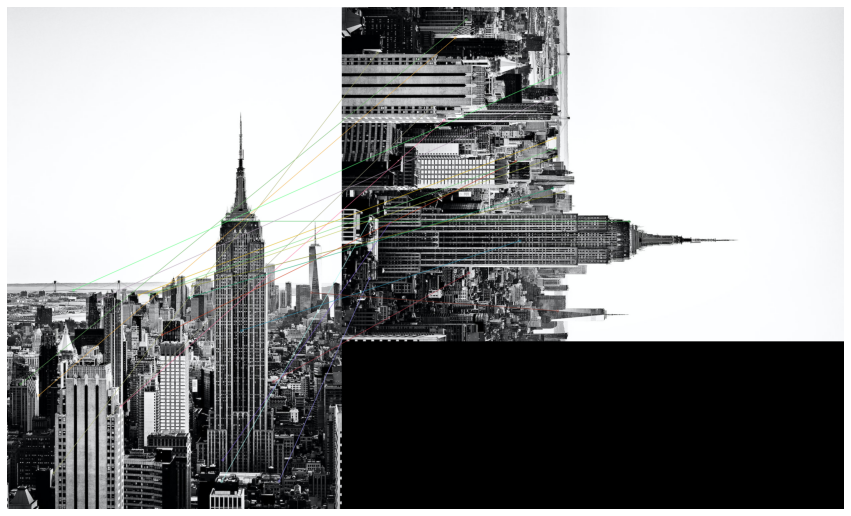

In [222]:
custom_match(img1,imag1)
